In [2]:
!git clone 'https://github.com/maniram3112/stock-vs-crypto-risk-return-analysis.git'

Cloning into 'stock-vs-crypto-risk-return-analysis'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 93 (delta 22), reused 56 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (93/93), 3.85 MiB | 21.54 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import os
import shutil
from google.colab import files

# Create output directory if not exists
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)

In [5]:
daily_returns_url = '/content/stock-vs-crypto-risk-return-analysis/results/daily_returns.csv'
summary_url = '/content/stock-vs-crypto-risk-return-analysis/results/summary_statistics.csv'

# Load
returns = pd.read_csv(daily_returns_url, index_col=0, parse_dates=True)
summary = pd.read_csv(summary_url, index_col=0)

In [12]:
# Sharpe Ratio (risk-free = 0)
summary["Sharpe Ratio"] = summary["Annualized Return"] / summary["Annualized Volatility"]

# Adjusted Sharpe with 3% risk-free rate
risk_free_rate = 0.03
excess_returns = summary["Annualized Return"] - risk_free_rate
summary["Sharpe Ratio (adj)"] = excess_returns / summary["Annualized Volatility"]

# Max Drawdown
def max_drawdown(series):
  cumulative = (1 + series).cumprod()
  peak = cumulative.cummax()
  drawdown = (cumulative - peak) / peak
  return drawdown.min()

summary["Max Drawdown"] = returns.apply(max_drawdown)

# Save updated summary
summary.to_csv(f"{output_dir}/risk_return_extended.csv")

# Correlation matrix
corr = returns.corr()
corr.to_csv(f"{output_dir}/correlation_matrix.csv")

print("risk_return_extended.csv")
print("correlation_matrix.csv")

summary

risk_return_extended.csv
correlation_matrix.csv


,mean_return,volatility,Annualized Return,Annualized Volatility,Sharpe Ratio,Sharpe Ratio (adj),Max Drawdown
BTC,0.002498,0.037521,0.629511,0.595621,1.056899,1.006531,-0.766686
ETH,0.003131,0.050354,0.788888,0.799343,0.986920,0.949389,-0.784374
XRP,0.004100,0.069945,1.033260,1.110337,0.930582,0.903563,-0.830593
AAPL,0.000794,0.017761,0.199971,0.281953,0.709236,0.602835,-0.333605
AMZN,0.000487,0.021764,0.122845,0.345498,0.355560,0.268729,-0.561453
GOOGL,0.001129,0.019229,0.284412,0.305259,0.931710,0.833433,-0.443201
INFY.NS,0.000480,0.014963,0.121001,0.237526,0.509422,0.383120,-0.355572
MSFT,0.000850,0.016139,0.214286,0.256192,0.836427,0.719328,-0.371485
RELIANCE.NS,0.000347,0.014439,0.087513,0.229218,0.381788,0.250908,-0.271757
TCS.NS,0.000278,0.013044,0.070066,0.207065,0.338379,0.193497,-0.352410


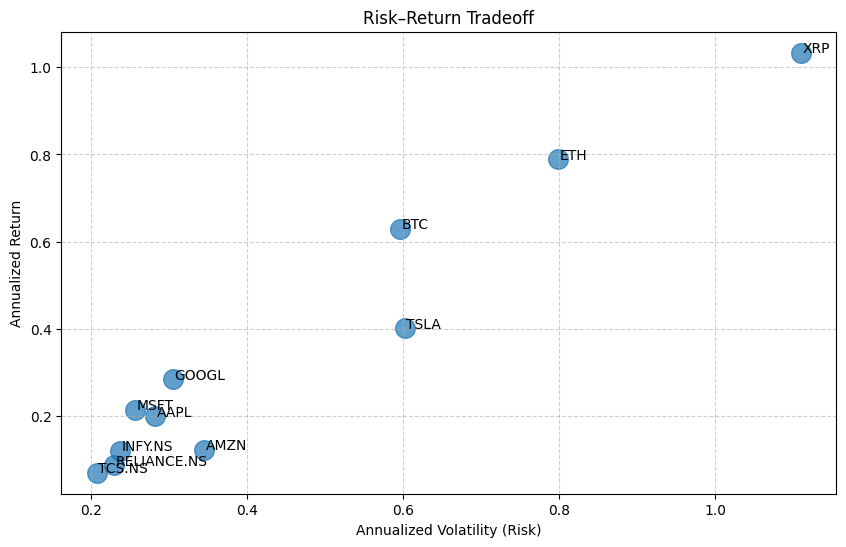

In [16]:
# Risk–Return Scatter
plt.figure(figsize=(10,6))
plt.scatter(summary["Annualized Volatility"], summary["Annualized Return"], s=200, alpha=0.7)

for asset in summary.index:
  plt.text(summary.loc[asset,"Annualized Volatility"]+0.002,
    summary.loc[asset,"Annualized Return"], asset)

plt.title("Risk–Return Tradeoff")
plt.xlabel("Annualized Volatility (Risk)")
plt.ylabel("Annualized Return")
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig(f"{output_dir}/risk_return_tradeoff", dpi=300)
plt.show()

# --- Max Drawdown Curves (Equity Curves) ---
for col in returns.columns:
    cumulative = (1 + returns[col]).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak

    plt.figure(figsize=(10,5))
    plt.plot(cumulative, label="Cumulative Return")
    plt.plot(peak, linestyle="--", label="Peak")
    plt.fill_between(drawdown.index, cumulative, peak, color="red", alpha=0.3, label="Drawdown")
    plt.title(f"Max Drawdown - {col}")
    plt.legend()
    plt.savefig(f"{output_dir}/drawdown_{col}.png", dpi=300)
    plt.close()
    plt.show()
# plt.show()

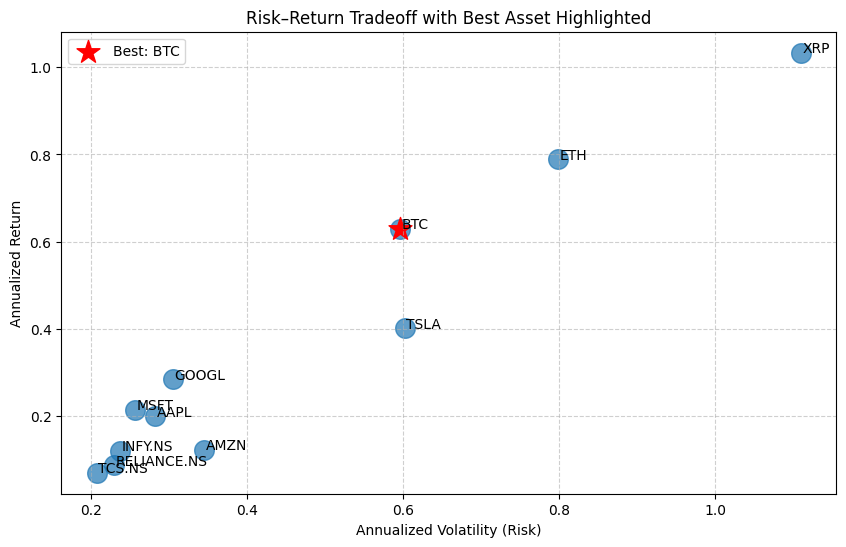

In [17]:
# Find the best asset by Sharpe Ratio
best_asset = summary["Sharpe Ratio"].idxmax()
best_x = summary.loc[best_asset, "Annualized Volatility"]
best_y = summary.loc[best_asset, "Annualized Return"]

plt.figure(figsize=(10,6))

# Scatter plot for all assets
plt.scatter(summary["Annualized Volatility"], summary["Annualized Return"], s=200, alpha=0.7)

# Highlight the best asset
plt.scatter(best_x, best_y, color="red", s=300, marker="*", label=f"Best: {best_asset}")
plt.legend()

# Annotate each asset
for asset in summary.index:
  plt.text(summary.loc[asset,"Annualized Volatility"]+0.002,
    summary.loc[asset,"Annualized Return"], asset)

plt.title("Risk–Return Tradeoff with Best Asset Highlighted")
plt.xlabel("Annualized Volatility (Risk)")
plt.ylabel("Annualized Return")
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig(f"{output_dir}/best_asset.png", dpi=300)
plt.show()


In [18]:
import shutil

# Create a zip file with all results
shutil.make_archive("results", 'zip', output_dir)

# Download the zip file
files.download("results.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>